In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [2]:
# 1. Create a binary classification dataset
# Setting n_informative=2 (all features informative), n_redundant=0, n_repeated=0
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# 4. Get the predicted probabilities (not just the binary predictions)
y_scores = model.predict_proba(X_test)[:, 1] # Since we are interested in the probability of class 1 (the positive class), we select the second column (index 1) from the predicted probabilities

# y_scores: This variable holds the predicted probabilities for the positive class for all the samples in X_test.

# 5. Calculate precision, recall, and thresholds for Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
# This function calculates precision, recall, and the corresponding thresholds 
# varying the decision boundary (threshold) over the range of predicted probabilities (y_scores)

In [4]:
model.decision_function([X_test[5]])

array([-0.61149385])

In [41]:
threshold = 0.5
# This sets the decision boundary to 0.5

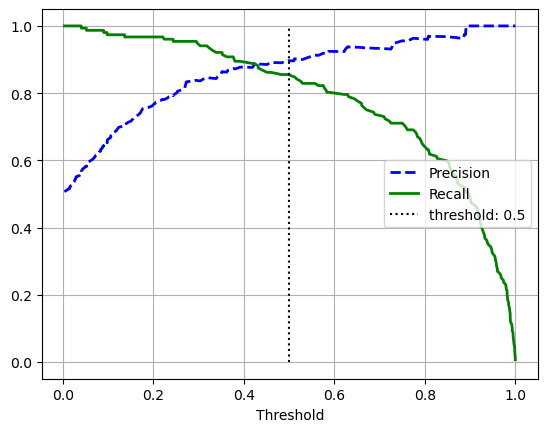

In [39]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.vlines(threshold, 0, 1.0, "k", "dotted", label=f"threshold: {threshold}")

plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
# save_fig("precision_recall_vs_threshold_plot")

plt.show()



In [29]:
idx = (thresholds >= threshold).argmax()
idx
# This is the index in the thresholds arrays corresponding to the threshold closest to 0.5

156

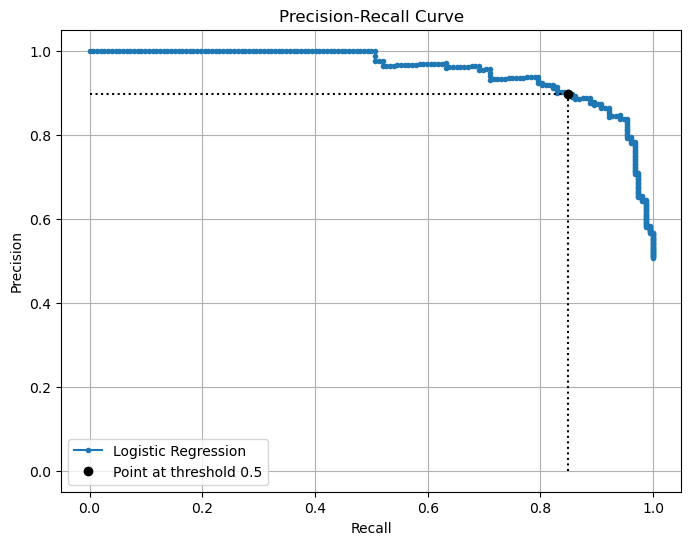

In [38]:
# 6. Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')

# Dotted Lines
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label=f"Point at threshold {threshold}")


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

In [7]:
# 7. Demonstrate the impact of changing the decision boundary
# Let's pick a threshold, say 0.5 (default for logistic regression) and adjust it
threshold = 0.5
y_pred_threshold = (y_scores >= threshold).astype(int)

# Print Precision and Recall at threshold 0.5
print(f'Precision at threshold 0.5: {precision_score(y_test, y_pred_threshold):.2f}')
print(f'Recall at threshold 0.5: {recall_score(y_test, y_pred_threshold):.2f}')

# Now let's lower the threshold to be more "inclusive" (higher recall but lower precision)
threshold = 0.3
y_pred_threshold = (y_scores >= threshold).astype(int)

# Print Precision and Recall at threshold 0.3
print(f'Precision at threshold 0.3: {precision_score(y_test, y_pred_threshold):.2f}')
print(f'Recall at threshold 0.3: {recall_score(y_test, y_pred_threshold):.2f}')

Precision at threshold 0.5: 0.90
Recall at threshold 0.5: 0.85
Precision at threshold 0.3: 0.84
Recall at threshold 0.3: 0.94
